In [2]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import sys,os
from sklearn import preprocessing

sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage
from IPython.core.display import display, HTML

import pandas as pd
import numpy as np
import scipy
import pprint

%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

In [4]:
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
pp = pprint.PrettyPrinter(indent=4)

In [5]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'MACross',
                  'RenkoPatterns_no_exit_on_patterns',
                  'VolatilityCompression',
                  'IchimokuCloud',
                  'PointAndFigurePatterns',
                  'SwingPoint',
                  'BollingerBands'],
    'exo_types': [   'BearishCollarBW',
                     'PutSpread',
                     'CallSpread',
                     'BullishCollarBW'],
    'instruments': ['NG', 'CL', 'ES']}


In [72]:
#instruments_filter = ['*']  # Select ALL
instruments_filter = ['CL']

#exo_filter = ['*'] # Select ALL
exo_filter = ['CallSpread']

#direction_filter = [0, -1, 1] # Select ALL
direction_filter = [-1]

#alpha_filter = ['*']  # Select ALL
alpha_filter = ['PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

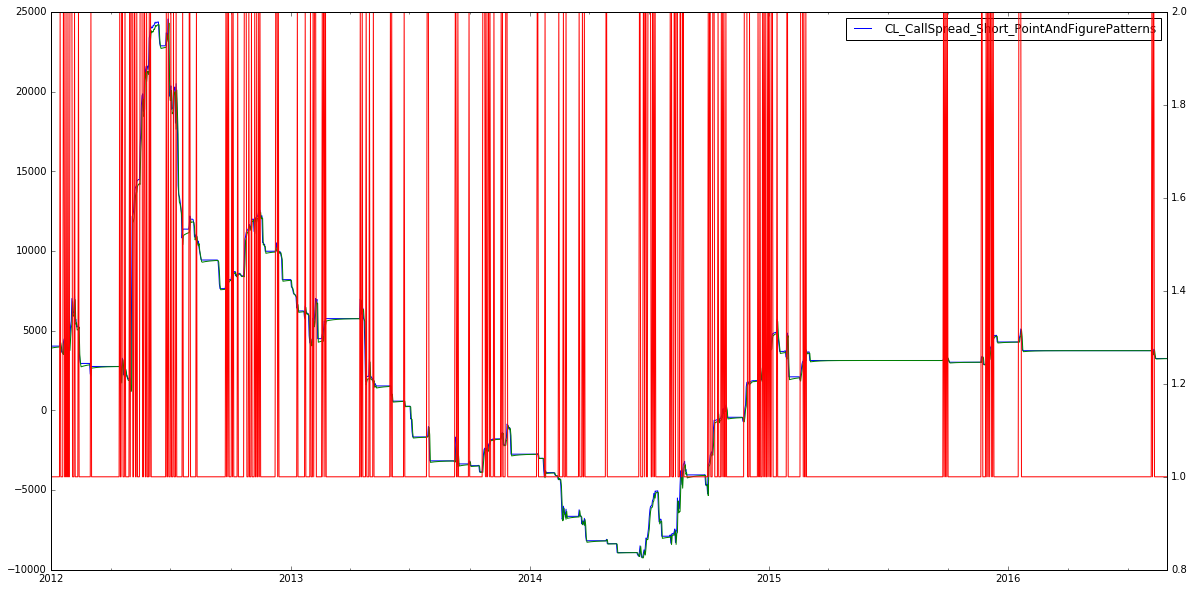

In [95]:
# Vola index indicator
O = L = H = C = swmdf[swmdf.columns[0]]
period = 15

atr = ATR(H, L, C, period)

close = swmdf[swmdf.columns[0]]

swmdf.ix['2012':].plot()
(close.shift(1) - atr * 0.5).ix['2012':].plot()
((close > (close.shift(1) + atr * 0.5))+1).ix['2012':].plot(secondary_y=True)

In [90]:
eqty = close.diff()
eqty_filter = close.shift(1) - atr * 0.5

filtered_eqty = eqty.copy()



for i in range(len(eqty)):
    if i > 0:
        if eqty_filter.shift(10)[i] < close.shift(0)[i]:
            filtered_eqty[i] = eqty[i]
            last_value = eqty[i]
            
        elif eqty_filter.shift(10)[i] > close.shift(0)[i]:
            filtered_eqty[i] = last_value
            last_value = 0

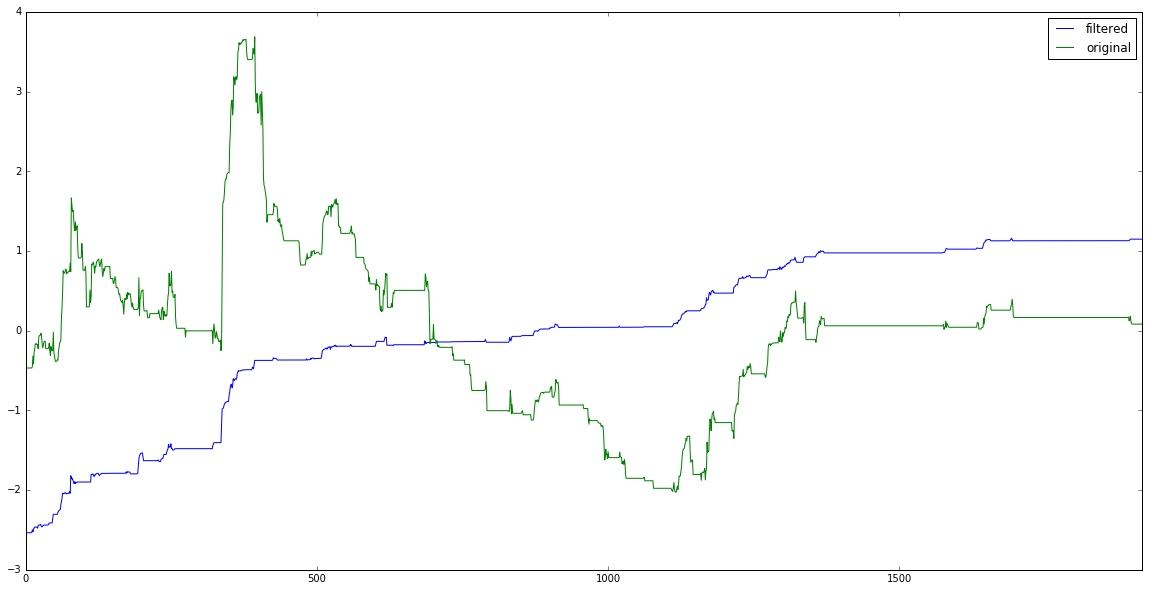

In [91]:
df = pd.DataFrame()
filtered = pd.Series(preprocessing.scale(filtered_eqty.cumsum().dropna()), name='filtered')
original = pd.Series(preprocessing.scale(close), name='original')

#df.plot()
pd.concat([filtered, original], axis=1).plot()

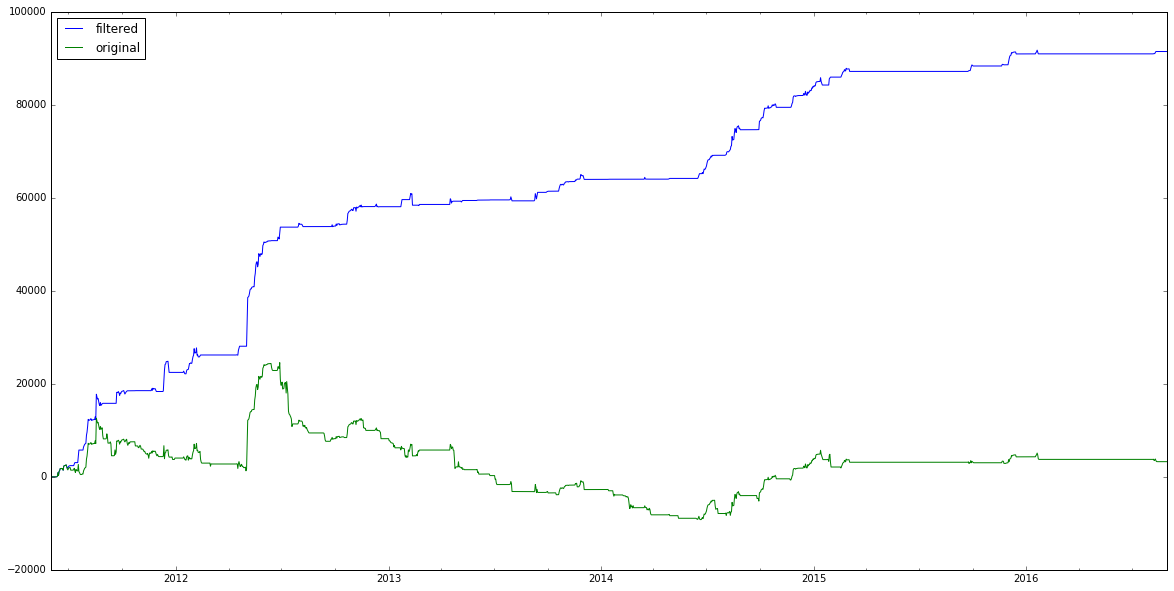

In [92]:
df = pd.DataFrame()
filtered = pd.Series(filtered_eqty.cumsum().dropna(), name='filtered')
original = pd.Series(close, name='original')

#df.plot()
pd.concat([filtered, original], axis=1).plot()

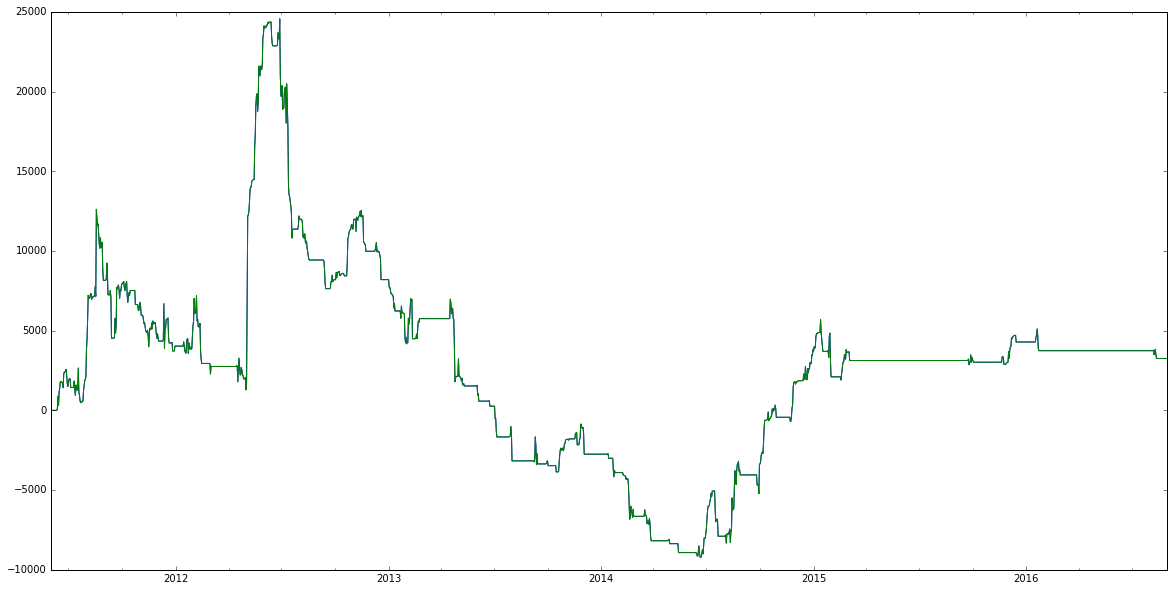

In [93]:
eqty.cumsum().plot()
close.plot()

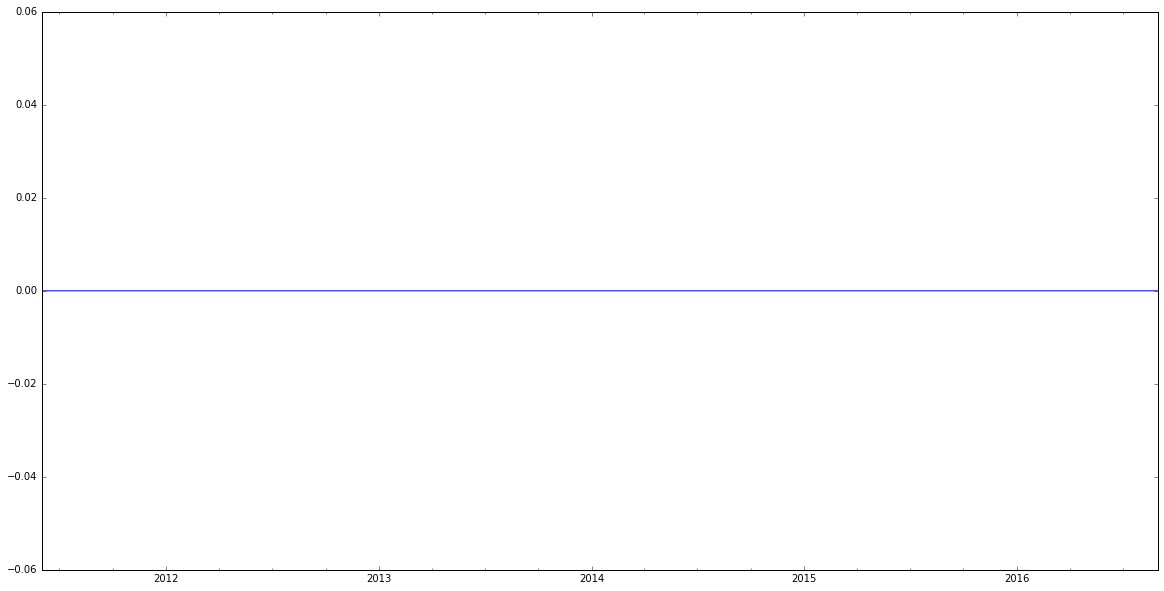

In [101]:
(eqty.cumsum() - close).plot()

In [31]:
%timeit (close.shift(1) - atr * 0.5)

1000 loops, best of 3: 203 µs per loop


In [32]:
%timeit close.rolling(2).median()

1000 loops, best of 3: 769 µs per loop
